In this part, you are going to implement a two-layer fully connected autoencoder on MNIST handwritten digits dataset without any deep learning libraries, using numpy only.

Important notes:

- Variables are named in this assignmend regarding following conventions:

     - Constants are named with uppercase words separated with underscores. eg. `INPUT_SIZE`, `LEARNING_RATE`.

     - Derivative of variables are named as variable name with `D_` prefix. For example, `D_x` indicates $\frac{\partial x}{\partial loss}$

     - Output of a layer n before activation function is denoted as `hn`. For example, output of first layer before activation is denoted as `h1`. 

     - Similarly, output of a layer n after activation function is denoted as `on`. For example, output of first layer after activation is denoted as `o1`. 


- The parts you need to fill in are marked with `##FILL HERE` comments. You should only change the lines marked with this comment. Also, you should not change the variable names in the marked lines.

- Try to use 'vectorized' code, that is, avoid for loops as much as possible and use vector and matrix operations instead. Not only performance of your code will be much higher, but also conforming to vectorized mindset makes everything easier for you when dealing with data science/machine learning problems.

- Recommended watch before starting the assignment, https://www.youtube.com/watch?v=lFOOjeH2wsY

- You may need to scale the dataset X between (0.0, 1.0) depending on the PIL and Numpy versions you use.

# 1) Boilerplate, imports, data loading

We can just copy and paste the file content to the notebook and all the functions will be available for use without importing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def load_dataset():

    mnist = torchvision.datasets.MNIST('./', train=True, download=True)

    X = np.zeros((len(mnist), 784))
    for n in range(len(mnist)):
        X[n] = np.array(mnist[n][0]).reshape(-1)
    return X

def test_weights(w1, w2, input_size, hidden_size):
    
    
    assert w1.shape == (input_size, hidden_size), "Error: Shape of your w1 matrix is not correct."
    assert w1.std() < 0.05, "Error: Standard deviation of your w1 matrix is too high."
    assert -0.2 < w1.mean() < 0.2, "Error: Mean of your w1 matrix needs to be near zero."

    assert w2.shape == (hidden_size, input_size), "Error: Shape of your w2 matrix is not correct."
    assert w2.std() < 0.05, "Error: Standard deviation of your w1 matrix is too high."
    assert -0.2 < w1.mean() < 0.2, "Error: Mean of your w2 matrix needs to be near zero."
    
    print("Weights are initialized properly.")
    

def test_relu(relu):
    test_x = np.arange(-5, 5, 0.1).reshape(10, 10)
    expected_output = np.array(
        [[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
        [2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9],
        [3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9],
        [4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]]
        )
    
    try:
        test_output = relu(test_x)
        test_diff = test_output - expected_output
        assert abs(test_diff).max() < 1e-8 
        print("'relu' is implemented properly.")
    except:
        print("Error: Your 'reluimplementation is not correct.")



def test_sigmoid(sigmoid):
    test_x = np.arange(-5, 5, 0.1).reshape(10, 10)
    expected_output = np.array(
        [[0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
        0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ],
       [0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
        0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725],
       [0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
        0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682],
       [0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
        0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989],
       [0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
        0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081],
       [0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
        0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ],
       [0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
        0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153],
       [0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.9168273 ,
        0.92414182, 0.93086158, 0.93702664, 0.94267582, 0.94784644],
       [0.95257413, 0.95689275, 0.96083428, 0.96442881, 0.96770454,
        0.97068777, 0.97340301, 0.97587298, 0.97811873, 0.98015969],
       [0.98201379, 0.9836975 , 0.98522597, 0.98661308, 0.98787157,
        0.98901306, 0.9900482 , 0.9909867 , 0.99183743, 0.99260846]]
        )
    
    
    try:
        test_output = sigmoid(test_x)
        test_diff = test_output - expected_output
        assert abs(test_diff).max() < 1e-8 
        print("'sigmoid' is implemented properly.")
    except:
        print("Error: Your 'sigmoid' implementation is not correct.")



def test_sigmoid_backward(sigmoid_backward):
    test_arg1 = np.arange(-5, 5, 0.1).reshape(10, 10)
    test_arg2   = np.arange(-5, 5, 0.1).reshape(10, 10)
    expected_output = np.array(
        [[ 1.50000000e+02,  1.41659000e+02,  1.33632000e+02,
         1.25913000e+02,  1.18496000e+02,  1.11375000e+02,
         1.04544000e+02,  9.79970000e+01,  9.17280000e+01,
         8.57310000e+01],
       [ 8.00000000e+01,  7.45290000e+01,  6.93120000e+01,
         6.43430000e+01,  5.96160000e+01,  5.51250000e+01,
         5.08640000e+01,  4.68270000e+01,  4.30080000e+01,
         3.94010000e+01],
       [ 3.60000000e+01,  3.27990000e+01,  2.97920000e+01,
         2.69730000e+01,  2.43360000e+01,  2.18750000e+01,
         1.95840000e+01,  1.74570000e+01,  1.54880000e+01,
         1.36710000e+01],
       [ 1.20000000e+01,  1.04690000e+01,  9.07200000e+00,
         7.80300000e+00,  6.65600000e+00,  5.62500000e+00,
         4.70400000e+00,  3.88700000e+00,  3.16800000e+00,
         2.54100000e+00],
       [ 2.00000000e+00,  1.53900000e+00,  1.15200000e+00,
         8.33000000e-01,  5.76000000e-01,  3.75000000e-01,
         2.24000000e-01,  1.17000000e-01,  4.80000000e-02,
         1.10000000e-02],
       [ 3.15544362e-28,  9.00000000e-03,  3.20000000e-02,
         6.30000000e-02,  9.60000000e-02,  1.25000000e-01,
         1.44000000e-01,  1.47000000e-01,  1.28000000e-01,
         8.10000000e-02],
       [ 2.13162821e-14, -1.21000000e-01, -2.88000000e-01,
        -5.07000000e-01, -7.84000000e-01, -1.12500000e+00,
        -1.53600000e+00, -2.02300000e+00, -2.59200000e+00,
        -3.24900000e+00],
       [-4.00000000e+00, -4.85100000e+00, -5.80800000e+00,
        -6.87700000e+00, -8.06400000e+00, -9.37500000e+00,
        -1.08160000e+01, -1.23930000e+01, -1.41120000e+01,
        -1.59790000e+01],
       [-1.80000000e+01, -2.01810000e+01, -2.25280000e+01,
        -2.50470000e+01, -2.77440000e+01, -3.06250000e+01,
        -3.36960000e+01, -3.69630000e+01, -4.04320000e+01,
        -4.41090000e+01],
       [-4.80000000e+01, -5.21110000e+01, -5.64480000e+01,
        -6.10170000e+01, -6.58240000e+01, -7.08750000e+01,
        -7.61760000e+01, -8.17330000e+01, -8.75520000e+01,
        -9.36390000e+01]])
    
    try:
        
        test_output = sigmoid_backward(test_arg1, test_arg2)
        test_diff = test_output - expected_output
        assert abs(test_diff).max() < 1e-8
        
        print("'sigmoid_backward' is implemented properly.")
        
    except:
        print("Error: Your 'sigmoid_backward' implementation is not correct.")
        

    
def test_mean_squared_error(mean_squared_error):
    
    test_arg1 = np.arange(-5, 5, 0.1).reshape(10, 10)
    test_arg2 = 3 * test_arg1 + np.cos(test_arg1)
    
    expected_output = 33.75615723805222
    
    try:
        test_output = mean_squared_error(test_arg1, test_arg2)
        test_diff = test_output - expected_output
        assert abs(test_diff).max() < 1e-8 
        
        print("'mean_squared_error' is implemented properly.")
        
    except:
        print("Error: Your 'mean_squared_error' implementation is not correct.")

In [2]:
#from test_utils import load_dataset, test_relu, test_sigmoid, test_mean_squared_error, test_sigmoid_backward, test_weights
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load_dataset function; 
# - takes training set of MNIST dataset from torch datasets,
# - flattens 28x28 images to 784 dimensional vectors


X = load_dataset() / 255


# - You need to scale dataset between 0 and 1 after loading the dataset
## - You may need to scale the dataset X between (0.0, 1.0) depending on the PIL and Numpy versions you use.
## Since minimum value of X is 0 and maximum value of X is 1 that it can be seen at the next code blocks, we can think that there is no need for scaling dataset between 0 and 1.
#X = #FILL HERE

In [3]:
print(X.max())
print(X.min())

1.0
0.0


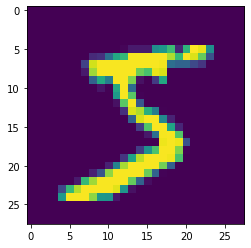

In [4]:
#visualize 1 sample
plt.imshow(X[0].reshape(28,28))
plt.show()

In [5]:
X.mean()

0.1306604762738429

# 2) Initialize Weights



Randomly initialize layer 1 and layer 2 weights as 2D numpy arrays with zero mean and 0.01 standard deviation. For simplicity, biases are omitted.

In [6]:
INPUT_SIZE  = X.shape[1]
HIDDEN_SIZE = 64

w1 = np.random.normal(0, 0.01, (INPUT_SIZE, HIDDEN_SIZE)) ## FILL HERE ##
w2 = np.random.normal(0, 0.01, (HIDDEN_SIZE, INPUT_SIZE)) ## FILL HERE ##


# 3) Define activation functions 

In this part, we will define the necessary function in numpy. Note that all functions need to operate on batches, not single instances. As a convention, first dimension of all tensors will be the batch dimension. 

Define relu and sigmoid activation functions in forward mode.

In [7]:
def relu(x):

  return np.maximum(0,x)

    ################
    ### FILL HERE ##
    ################

In [8]:
def sigmoid(x):

  return 1.0/(1.0 + np.exp(-x))

    ################
    ### FILL HERE ##
    ################

# 4.a) Define activation functions in 'backward mode'
Suppose you know the derivative of a function's output with respect to the loss, which is $\frac{\partial loss}{\partial f(x)}$. Backward mode of a function takes $\frac{\partial loss}{\partial f(x)}$ (```D_output``` argument) and gives derivatives of its input with respect to the loss $\frac{\partial loss}{\partial x}$. 

Backward mode of relu is defined below. Using this as an example, sigmoid activation function in backward mode. You are going to use these functions to implement backpropagation. 



In [9]:
#Note: If you are confused about D_output means, read the notes at the top of the page.
def relu_backward(D_output, output):

    '''
    relu_backward: Backward mode of relu activation function
    
    Arguments;
    D_output: Derivative of output of relu with respect to loss.
    output  : Output of relu activation function
    
    Returns;
    Derivative of input of relu function with respect to loss.
    '''
    input = output
    d_input = D_output*(input>0)
    return d_input

  ################
  ### FILL HERE ##
  ################


In [10]:
def sigmoid_backward(D_output, output):
    '''
    sigmoid_backward: Backward mode of sigmoid activation function
    
    Arguments;
    D_output: Derivative of output of sigmoid with respect to loss.
    output  : Output of sigmoid activation function
    
    Returns;
    Derivative of input of sigmoid function with respect to loss.
    '''
    d_input = D_output*output*(1-output)
    return d_input

  ################
  ### FILL HERE ##
  ################

# 4.b) Define loss function


Define the function computing mean squared error metric, given outputs and targets.

In [11]:
def mean_squared_error(outputs, targets):
    squared_errors = np.square(np.subtract(targets,outputs))  ## FILL HERE ##
    return np.mean(squared_errors)

# 5) Sanity Check
Since Part 6 will be a little more difficult than the other parts, make sure everything is correct so far using test scripts before proceeding Part 6,(just run the cell below). If anything is incorrect with your implementations, do not start implementing part 6 before fixing the mistakes and making sure everything works as intended.

Note: Don't forget to run cells after making changes in them or you may re-test your old implementations unintentionally.

In [12]:
test_weights(w1, w2, INPUT_SIZE, HIDDEN_SIZE)
test_relu(relu)
test_sigmoid(sigmoid)
test_sigmoid_backward(sigmoid_backward)
test_mean_squared_error(mean_squared_error)

Weights are initialized properly.
'relu' is implemented properly.
'sigmoid' is implemented properly.
'sigmoid_backward' is implemented properly.
'mean_squared_error' is implemented properly.


# 6) Training

Set hyperparameters

In [13]:
BATCH_SIZE = 1024
NUM_EPOCHS = 10
LEARNING_RATE = 0.0001

Calculate how many iterations will be done per epoch.

Hint: You may want to use `//` operator, which does integer division in Python 3.

In [14]:
NUM_TRAINING_INSTANCES = X.shape[0]

In [15]:
ITERATIONS_PER_EPOCH = NUM_TRAINING_INSTANCES//BATCH_SIZE ## FILL HERE ##

Training loop mainly consists of 4 steps

1) Sample batch from dataset

2) Forward propagation

3) Backpropagation

4) Parameter updates

1st and 4th steps are implemented. You are expected to implement forward propagation and backpropagation using the functions you defined above. 

- You can use ```@``` operator or ```np.dot``` function for matrix multiplication.
- Note that you have implemented every backward operation needed, except matrix multiplication. Find out what is the backward mode of matrix multiplication operation. Or derive it, if you feel adventurous.

Epoch 1, Iteration 0 -- Loss: 0.231331


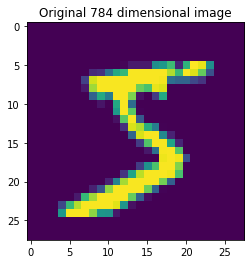

Epoch 1, Iteration 1 -- Loss: 0.231567
Epoch 1, Iteration 2 -- Loss: 0.231015
Epoch 1, Iteration 3 -- Loss: 0.231165
Epoch 1, Iteration 4 -- Loss: 0.231263
Epoch 1, Iteration 5 -- Loss: 0.231091
Epoch 1, Iteration 6 -- Loss: 0.231537
Epoch 1, Iteration 7 -- Loss: 0.231323
Epoch 1, Iteration 8 -- Loss: 0.231563
Epoch 1, Iteration 9 -- Loss: 0.231174
Epoch 1, Iteration 10 -- Loss: 0.231330


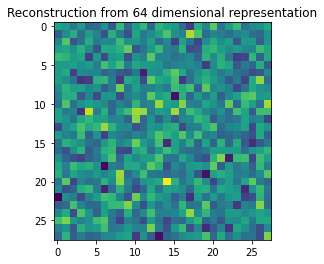

Epoch 1, Iteration 11 -- Loss: 0.231796
Epoch 1, Iteration 12 -- Loss: 0.230740
Epoch 1, Iteration 13 -- Loss: 0.231165
Epoch 1, Iteration 14 -- Loss: 0.231303
Epoch 1, Iteration 15 -- Loss: 0.231269
Epoch 1, Iteration 16 -- Loss: 0.230958
Epoch 1, Iteration 17 -- Loss: 0.231794
Epoch 1, Iteration 18 -- Loss: 0.231017
Epoch 1, Iteration 19 -- Loss: 0.231159
Epoch 1, Iteration 20 -- Loss: 0.231108


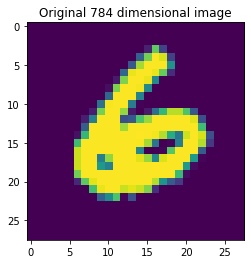

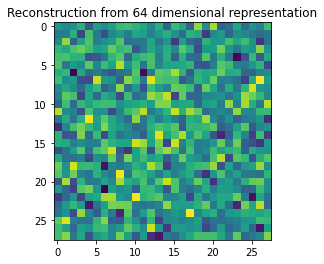

Epoch 1, Iteration 21 -- Loss: 0.230932
Epoch 1, Iteration 22 -- Loss: 0.231387
Epoch 1, Iteration 23 -- Loss: 0.230928
Epoch 1, Iteration 24 -- Loss: 0.231495
Epoch 1, Iteration 25 -- Loss: 0.231451
Epoch 1, Iteration 26 -- Loss: 0.230788
Epoch 1, Iteration 27 -- Loss: 0.231228
Epoch 1, Iteration 28 -- Loss: 0.230625
Epoch 1, Iteration 29 -- Loss: 0.230997
Epoch 1, Iteration 30 -- Loss: 0.230920


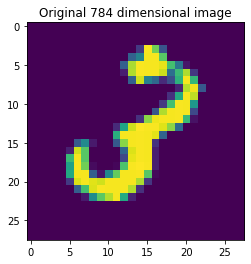

Epoch 1, Iteration 31 -- Loss: 0.231045
Epoch 1, Iteration 32 -- Loss: 0.230795
Epoch 1, Iteration 33 -- Loss: 0.230905
Epoch 1, Iteration 34 -- Loss: 0.230725
Epoch 1, Iteration 35 -- Loss: 0.230574
Epoch 1, Iteration 36 -- Loss: 0.230911
Epoch 1, Iteration 37 -- Loss: 0.230737
Epoch 1, Iteration 38 -- Loss: 0.231082
Epoch 1, Iteration 39 -- Loss: 0.230697
Epoch 1, Iteration 40 -- Loss: 0.230757


Epoch 1, Iteration 41 -- Loss: 0.230767
Epoch 1, Iteration 42 -- Loss: 0.230828
Epoch 1, Iteration 43 -- Loss: 0.230343
Epoch 1, Iteration 44 -- Loss: 0.230149
Epoch 1, Iteration 45 -- Loss: 0.230498
Epoch 1, Iteration 46 -- Loss: 0.230688
Epoch 1, Iteration 47 -- Loss: 0.230582
Epoch 1, Iteration 48 -- Loss: 0.230313
Epoch 1, Iteration 49 -- Loss: 0.230554
Epoch 1, Iteration 50 -- Loss: 0.230350


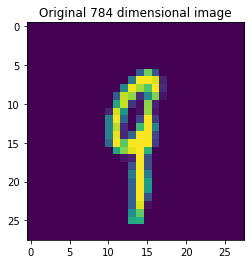

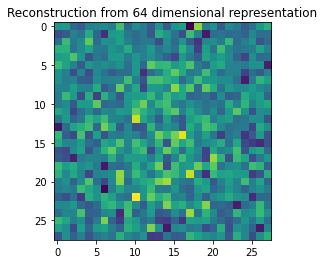

Epoch 1, Iteration 51 -- Loss: 0.230578
Epoch 1, Iteration 52 -- Loss: 0.230294
Epoch 1, Iteration 53 -- Loss: 0.230541
Epoch 1, Iteration 54 -- Loss: 0.230588
Epoch 1, Iteration 55 -- Loss: 0.230531
Epoch 1, Iteration 56 -- Loss: 0.230070
Epoch 1, Iteration 57 -- Loss: 0.229841
Epoch 2, Iteration 58 -- Loss: 0.230341


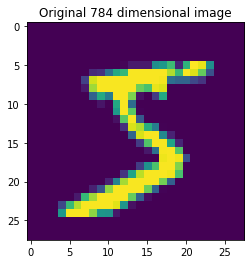

Epoch 2, Iteration 59 -- Loss: 0.230520
Epoch 2, Iteration 60 -- Loss: 0.229967
Epoch 2, Iteration 61 -- Loss: 0.230123
Epoch 2, Iteration 62 -- Loss: 0.230176
Epoch 2, Iteration 63 -- Loss: 0.229922
Epoch 2, Iteration 64 -- Loss: 0.230396
Epoch 2, Iteration 65 -- Loss: 0.230213
Epoch 2, Iteration 66 -- Loss: 0.230353
Epoch 2, Iteration 67 -- Loss: 0.229975
Epoch 2, Iteration 68 -- Loss: 0.230033


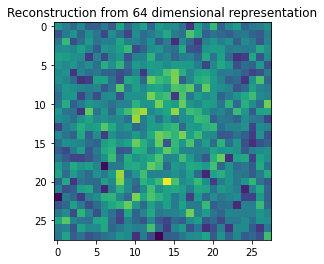

Epoch 2, Iteration 69 -- Loss: 0.230504
Epoch 2, Iteration 70 -- Loss: 0.229405
Epoch 2, Iteration 71 -- Loss: 0.229823
Epoch 2, Iteration 72 -- Loss: 0.230007
Epoch 2, Iteration 73 -- Loss: 0.229890
Epoch 2, Iteration 74 -- Loss: 0.229569
Epoch 2, Iteration 75 -- Loss: 0.230392
Epoch 2, Iteration 76 -- Loss: 0.229542
Epoch 2, Iteration 77 -- Loss: 0.229592
Epoch 2, Iteration 78 -- Loss: 0.229538


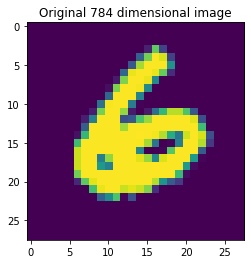

Epoch 2, Iteration 79 -- Loss: 0.229328
Epoch 2, Iteration 80 -- Loss: 0.229654
Epoch 2, Iteration 81 -- Loss: 0.229247
Epoch 2, Iteration 82 -- Loss: 0.229716
Epoch 2, Iteration 83 -- Loss: 0.229769
Epoch 2, Iteration 84 -- Loss: 0.228976
Epoch 2, Iteration 85 -- Loss: 0.229287
Epoch 2, Iteration 86 -- Loss: 0.228671
Epoch 2, Iteration 87 -- Loss: 0.229148
Epoch 2, Iteration 88 -- Loss: 0.229042


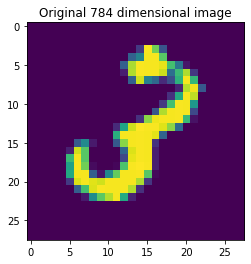

Epoch 2, Iteration 89 -- Loss: 0.228973
Epoch 2, Iteration 90 -- Loss: 0.228704
Epoch 2, Iteration 91 -- Loss: 0.228695
Epoch 2, Iteration 92 -- Loss: 0.228479
Epoch 2, Iteration 93 -- Loss: 0.228213
Epoch 2, Iteration 94 -- Loss: 0.228483
Epoch 2, Iteration 95 -- Loss: 0.228334
Epoch 2, Iteration 96 -- Loss: 0.228544
Epoch 2, Iteration 97 -- Loss: 0.228146
Epoch 2, Iteration 98 -- Loss: 0.228244


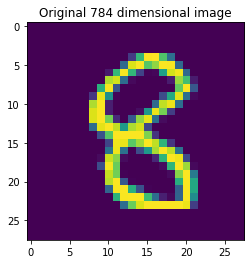

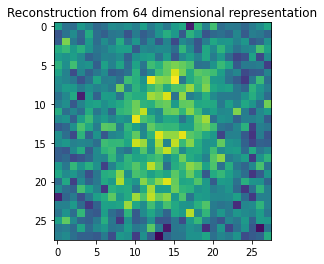

Epoch 2, Iteration 99 -- Loss: 0.227981
Epoch 2, Iteration 100 -- Loss: 0.228025
Epoch 2, Iteration 101 -- Loss: 0.227569
Epoch 2, Iteration 102 -- Loss: 0.227375
Epoch 2, Iteration 103 -- Loss: 0.227512
Epoch 2, Iteration 104 -- Loss: 0.227502
Epoch 2, Iteration 105 -- Loss: 0.227292
Epoch 2, Iteration 106 -- Loss: 0.227124
Epoch 2, Iteration 107 -- Loss: 0.227161
Epoch 2, Iteration 108 -- Loss: 0.226981


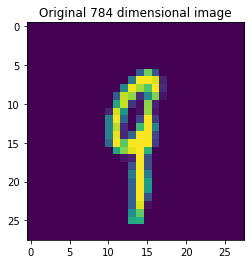

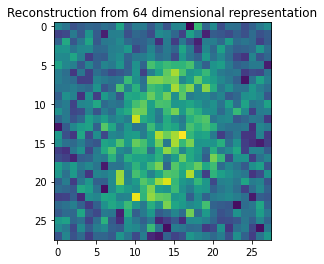

Epoch 2, Iteration 109 -- Loss: 0.226955
Epoch 2, Iteration 110 -- Loss: 0.226788
Epoch 2, Iteration 111 -- Loss: 0.226658
Epoch 2, Iteration 112 -- Loss: 0.226530
Epoch 2, Iteration 113 -- Loss: 0.226691
Epoch 2, Iteration 114 -- Loss: 0.226177
Epoch 2, Iteration 115 -- Loss: 0.225630
Epoch 3, Iteration 116 -- Loss: 0.226051


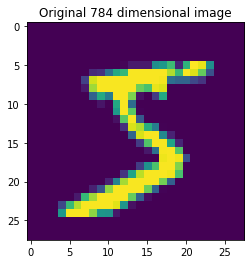

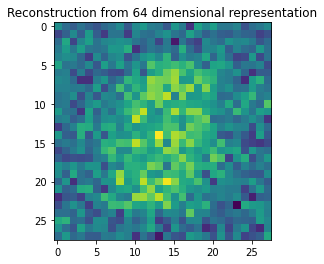

Epoch 3, Iteration 117 -- Loss: 0.225907
Epoch 3, Iteration 118 -- Loss: 0.225341
Epoch 3, Iteration 119 -- Loss: 0.225505
Epoch 3, Iteration 120 -- Loss: 0.225307
Epoch 3, Iteration 121 -- Loss: 0.224575
Epoch 3, Iteration 122 -- Loss: 0.225162
Epoch 3, Iteration 123 -- Loss: 0.225107
Epoch 3, Iteration 124 -- Loss: 0.224705
Epoch 3, Iteration 125 -- Loss: 0.224374
Epoch 3, Iteration 126 -- Loss: 0.223868


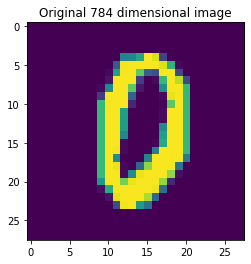

Epoch 3, Iteration 127 -- Loss: 0.224354
Epoch 3, Iteration 128 -- Loss: 0.223045
Epoch 3, Iteration 129 -- Loss: 0.223391
Epoch 3, Iteration 130 -- Loss: 0.223794
Epoch 3, Iteration 131 -- Loss: 0.223209
Epoch 3, Iteration 132 -- Loss: 0.222806
Epoch 3, Iteration 133 -- Loss: 0.223524
Epoch 3, Iteration 134 -- Loss: 0.222300
Epoch 3, Iteration 135 -- Loss: 0.221868
Epoch 3, Iteration 136 -- Loss: 0.221781


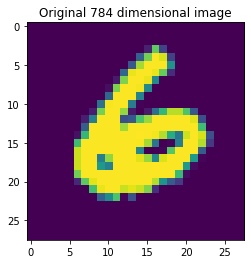

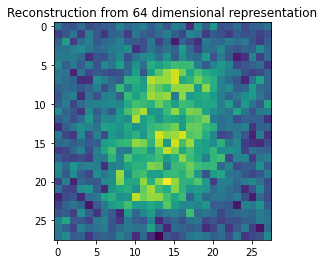

Epoch 3, Iteration 137 -- Loss: 0.221383
Epoch 3, Iteration 138 -- Loss: 0.221001
Epoch 3, Iteration 139 -- Loss: 0.220864
Epoch 3, Iteration 140 -- Loss: 0.220785
Epoch 3, Iteration 141 -- Loss: 0.221315
Epoch 3, Iteration 142 -- Loss: 0.219852
Epoch 3, Iteration 143 -- Loss: 0.219485
Epoch 3, Iteration 144 -- Loss: 0.218804
Epoch 3, Iteration 145 -- Loss: 0.219805
Epoch 3, Iteration 146 -- Loss: 0.219543


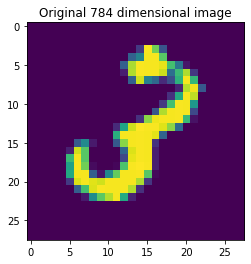

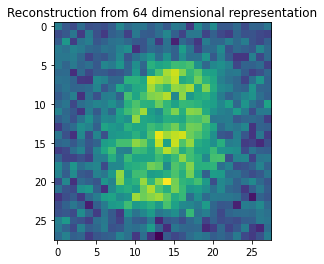

Epoch 3, Iteration 147 -- Loss: 0.218459
Epoch 3, Iteration 148 -- Loss: 0.218092
Epoch 3, Iteration 149 -- Loss: 0.217447
Epoch 3, Iteration 150 -- Loss: 0.217066
Epoch 3, Iteration 151 -- Loss: 0.216209
Epoch 3, Iteration 152 -- Loss: 0.216138
Epoch 3, Iteration 153 -- Loss: 0.216119
Epoch 3, Iteration 154 -- Loss: 0.215648
Epoch 3, Iteration 155 -- Loss: 0.215198
Epoch 3, Iteration 156 -- Loss: 0.215486


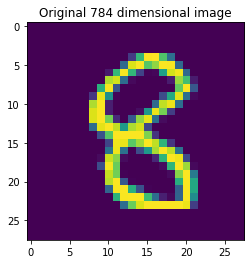

Epoch 3, Iteration 157 -- Loss: 0.213861
Epoch 3, Iteration 158 -- Loss: 0.213843
Epoch 3, Iteration 159 -- Loss: 0.213494
Epoch 3, Iteration 160 -- Loss: 0.213328
Epoch 3, Iteration 161 -- Loss: 0.212414
Epoch 3, Iteration 162 -- Loss: 0.211450
Epoch 3, Iteration 163 -- Loss: 0.210742
Epoch 3, Iteration 164 -- Loss: 0.211086
Epoch 3, Iteration 165 -- Loss: 0.210117
Epoch 3, Iteration 166 -- Loss: 0.210132


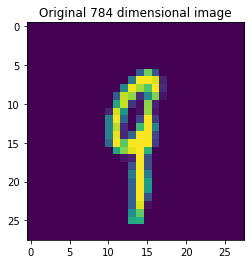

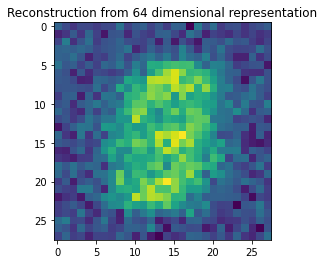

Epoch 3, Iteration 167 -- Loss: 0.208883
Epoch 3, Iteration 168 -- Loss: 0.209299
Epoch 3, Iteration 169 -- Loss: 0.207353
Epoch 3, Iteration 170 -- Loss: 0.206501
Epoch 3, Iteration 171 -- Loss: 0.207705
Epoch 3, Iteration 172 -- Loss: 0.206991
Epoch 3, Iteration 173 -- Loss: 0.205017
Epoch 4, Iteration 174 -- Loss: 0.205061


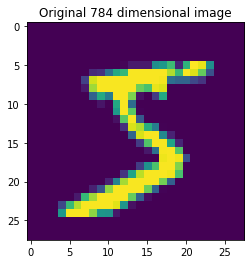

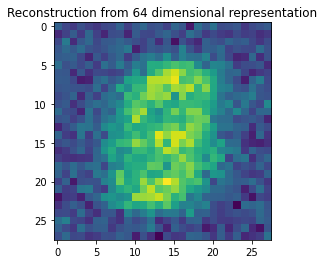

Epoch 4, Iteration 175 -- Loss: 0.203499
Epoch 4, Iteration 176 -- Loss: 0.202934
Epoch 4, Iteration 177 -- Loss: 0.203187
Epoch 4, Iteration 178 -- Loss: 0.201954
Epoch 4, Iteration 179 -- Loss: 0.199122
Epoch 4, Iteration 180 -- Loss: 0.200249
Epoch 4, Iteration 181 -- Loss: 0.200857
Epoch 4, Iteration 182 -- Loss: 0.198144
Epoch 4, Iteration 183 -- Loss: 0.198129
Epoch 4, Iteration 184 -- Loss: 0.195280


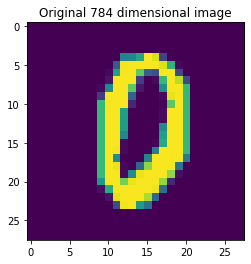

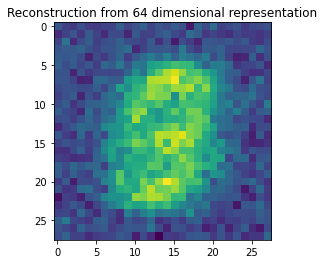

Epoch 4, Iteration 185 -- Loss: 0.195861
Epoch 4, Iteration 186 -- Loss: 0.193969
Epoch 4, Iteration 187 -- Loss: 0.194119
Epoch 4, Iteration 188 -- Loss: 0.195442
Epoch 4, Iteration 189 -- Loss: 0.193003
Epoch 4, Iteration 190 -- Loss: 0.192352
Epoch 4, Iteration 191 -- Loss: 0.192691
Epoch 4, Iteration 192 -- Loss: 0.190170
Epoch 4, Iteration 193 -- Loss: 0.188092
Epoch 4, Iteration 194 -- Loss: 0.187954


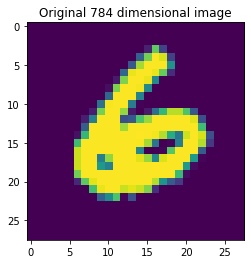

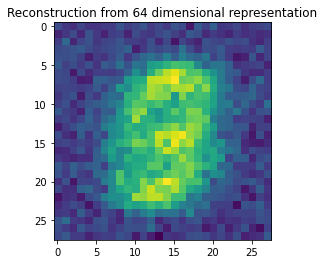

Epoch 4, Iteration 195 -- Loss: 0.187071
Epoch 4, Iteration 196 -- Loss: 0.184180
Epoch 4, Iteration 197 -- Loss: 0.185132
Epoch 4, Iteration 198 -- Loss: 0.183264
Epoch 4, Iteration 199 -- Loss: 0.185618
Epoch 4, Iteration 200 -- Loss: 0.181998
Epoch 4, Iteration 201 -- Loss: 0.179496
Epoch 4, Iteration 202 -- Loss: 0.178839
Epoch 4, Iteration 203 -- Loss: 0.181739
Epoch 4, Iteration 204 -- Loss: 0.181121


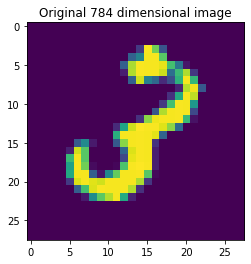

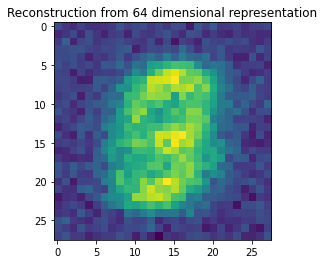

Epoch 4, Iteration 205 -- Loss: 0.176807
Epoch 4, Iteration 206 -- Loss: 0.176315
Epoch 4, Iteration 207 -- Loss: 0.173783
Epoch 4, Iteration 208 -- Loss: 0.173205
Epoch 4, Iteration 209 -- Loss: 0.171143
Epoch 4, Iteration 210 -- Loss: 0.170104
Epoch 4, Iteration 211 -- Loss: 0.170631
Epoch 4, Iteration 212 -- Loss: 0.168533
Epoch 4, Iteration 213 -- Loss: 0.168196
Epoch 4, Iteration 214 -- Loss: 0.169495


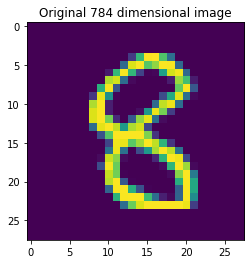

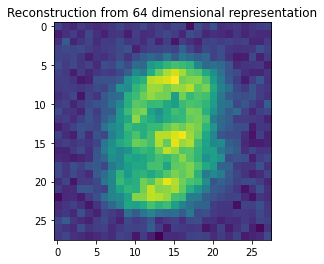

Epoch 4, Iteration 215 -- Loss: 0.164337
Epoch 4, Iteration 216 -- Loss: 0.164113
Epoch 4, Iteration 217 -- Loss: 0.164455
Epoch 4, Iteration 218 -- Loss: 0.164858
Epoch 4, Iteration 219 -- Loss: 0.161415
Epoch 4, Iteration 220 -- Loss: 0.158688
Epoch 4, Iteration 221 -- Loss: 0.157213
Epoch 4, Iteration 222 -- Loss: 0.158923
Epoch 4, Iteration 223 -- Loss: 0.155747
Epoch 4, Iteration 224 -- Loss: 0.156960


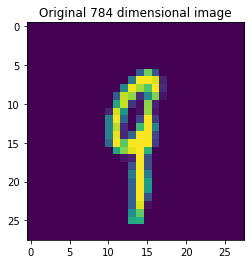

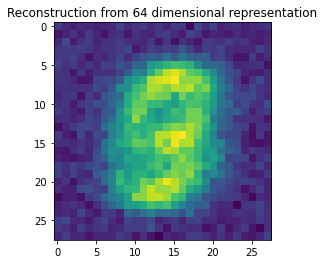

Epoch 4, Iteration 225 -- Loss: 0.153098
Epoch 4, Iteration 226 -- Loss: 0.155251
Epoch 4, Iteration 227 -- Loss: 0.149930
Epoch 4, Iteration 228 -- Loss: 0.148247
Epoch 4, Iteration 229 -- Loss: 0.152033
Epoch 4, Iteration 230 -- Loss: 0.151212
Epoch 4, Iteration 231 -- Loss: 0.146765
Epoch 5, Iteration 232 -- Loss: 0.146641


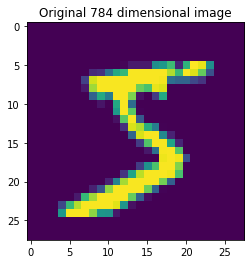

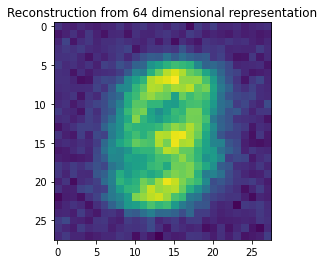

Epoch 5, Iteration 233 -- Loss: 0.143617
Epoch 5, Iteration 234 -- Loss: 0.143137
Epoch 5, Iteration 235 -- Loss: 0.143945
Epoch 5, Iteration 236 -- Loss: 0.142036
Epoch 5, Iteration 237 -- Loss: 0.136860
Epoch 5, Iteration 238 -- Loss: 0.138711
Epoch 5, Iteration 239 -- Loss: 0.141131
Epoch 5, Iteration 240 -- Loss: 0.135851
Epoch 5, Iteration 241 -- Loss: 0.136941
Epoch 5, Iteration 242 -- Loss: 0.131844


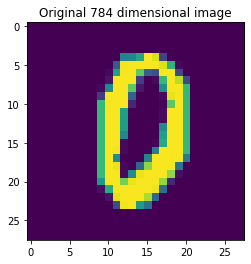

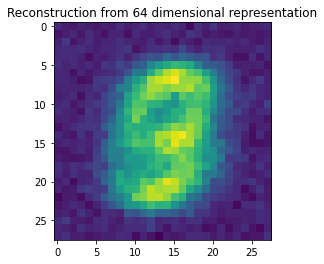

Epoch 5, Iteration 243 -- Loss: 0.132331
Epoch 5, Iteration 244 -- Loss: 0.131868
Epoch 5, Iteration 245 -- Loss: 0.132409
Epoch 5, Iteration 246 -- Loss: 0.134333
Epoch 5, Iteration 247 -- Loss: 0.130319
Epoch 5, Iteration 248 -- Loss: 0.129944
Epoch 5, Iteration 249 -- Loss: 0.130014
Epoch 5, Iteration 250 -- Loss: 0.127570
Epoch 5, Iteration 251 -- Loss: 0.125495
Epoch 5, Iteration 252 -- Loss: 0.125235


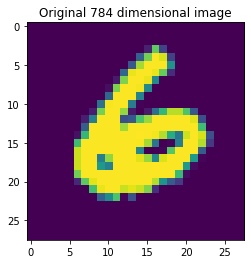

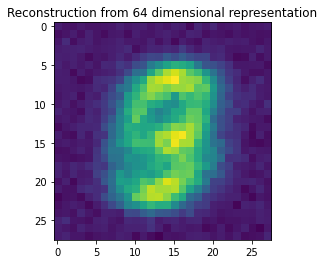

Epoch 5, Iteration 253 -- Loss: 0.125239
Epoch 5, Iteration 254 -- Loss: 0.121484
Epoch 5, Iteration 255 -- Loss: 0.122649
Epoch 5, Iteration 256 -- Loss: 0.120812
Epoch 5, Iteration 257 -- Loss: 0.124424
Epoch 5, Iteration 258 -- Loss: 0.120608
Epoch 5, Iteration 259 -- Loss: 0.118198
Epoch 5, Iteration 260 -- Loss: 0.117978
Epoch 5, Iteration 261 -- Loss: 0.121673
Epoch 5, Iteration 262 -- Loss: 0.121418


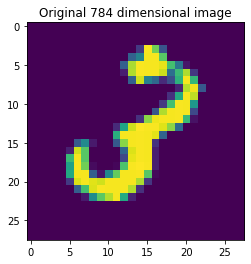

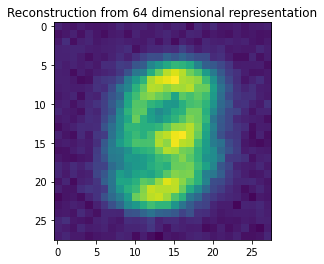

Epoch 5, Iteration 263 -- Loss: 0.116436
Epoch 5, Iteration 264 -- Loss: 0.116318
Epoch 5, Iteration 265 -- Loss: 0.113513
Epoch 5, Iteration 266 -- Loss: 0.113684
Epoch 5, Iteration 267 -- Loss: 0.113898
Epoch 5, Iteration 268 -- Loss: 0.111978
Epoch 5, Iteration 269 -- Loss: 0.112565
Epoch 5, Iteration 270 -- Loss: 0.111226
Epoch 5, Iteration 271 -- Loss: 0.111285
Epoch 5, Iteration 272 -- Loss: 0.113935


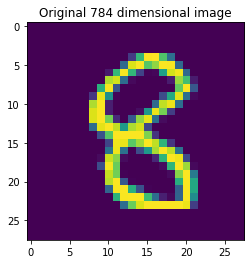

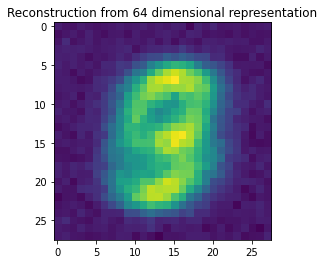

Epoch 5, Iteration 273 -- Loss: 0.108979
Epoch 5, Iteration 274 -- Loss: 0.107457
Epoch 5, Iteration 275 -- Loss: 0.108966
Epoch 5, Iteration 276 -- Loss: 0.110644
Epoch 5, Iteration 277 -- Loss: 0.107282
Epoch 5, Iteration 278 -- Loss: 0.106133
Epoch 5, Iteration 279 -- Loss: 0.105429
Epoch 5, Iteration 280 -- Loss: 0.106540
Epoch 5, Iteration 281 -- Loss: 0.103313
Epoch 5, Iteration 282 -- Loss: 0.106129


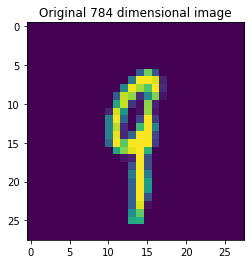

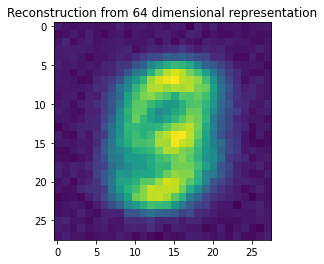

Epoch 5, Iteration 283 -- Loss: 0.102112
Epoch 5, Iteration 284 -- Loss: 0.104711
Epoch 5, Iteration 285 -- Loss: 0.100951
Epoch 5, Iteration 286 -- Loss: 0.100312
Epoch 5, Iteration 287 -- Loss: 0.104021
Epoch 5, Iteration 288 -- Loss: 0.103350
Epoch 5, Iteration 289 -- Loss: 0.099570
Epoch 6, Iteration 290 -- Loss: 0.100279


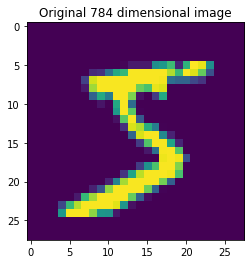

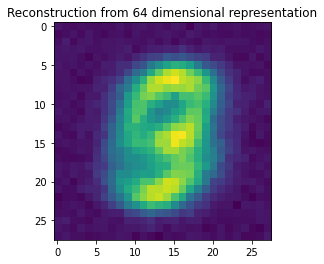

Epoch 6, Iteration 291 -- Loss: 0.099414
Epoch 6, Iteration 292 -- Loss: 0.098622
Epoch 6, Iteration 293 -- Loss: 0.099298
Epoch 6, Iteration 294 -- Loss: 0.099679
Epoch 6, Iteration 295 -- Loss: 0.096807
Epoch 6, Iteration 296 -- Loss: 0.096712
Epoch 6, Iteration 297 -- Loss: 0.099574
Epoch 6, Iteration 298 -- Loss: 0.096487
Epoch 6, Iteration 299 -- Loss: 0.097696
Epoch 6, Iteration 300 -- Loss: 0.094793


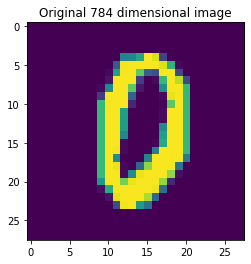

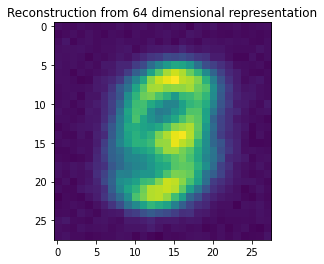

Epoch 6, Iteration 301 -- Loss: 0.093846
Epoch 6, Iteration 302 -- Loss: 0.096620
Epoch 6, Iteration 303 -- Loss: 0.097228
Epoch 6, Iteration 304 -- Loss: 0.096873
Epoch 6, Iteration 305 -- Loss: 0.094211
Epoch 6, Iteration 306 -- Loss: 0.094120
Epoch 6, Iteration 307 -- Loss: 0.093687
Epoch 6, Iteration 308 -- Loss: 0.093630
Epoch 6, Iteration 309 -- Loss: 0.094251
Epoch 6, Iteration 310 -- Loss: 0.092889


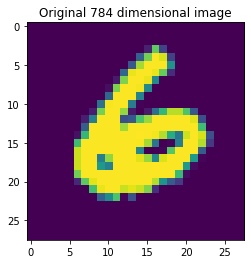

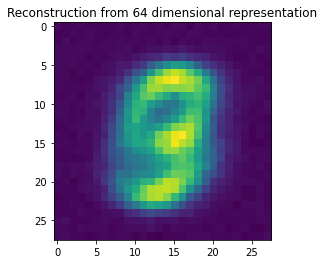

Epoch 6, Iteration 311 -- Loss: 0.093991
Epoch 6, Iteration 312 -- Loss: 0.092688
Epoch 6, Iteration 313 -- Loss: 0.091387
Epoch 6, Iteration 314 -- Loss: 0.091338
Epoch 6, Iteration 315 -- Loss: 0.093029
Epoch 6, Iteration 316 -- Loss: 0.091886
Epoch 6, Iteration 317 -- Loss: 0.091482
Epoch 6, Iteration 318 -- Loss: 0.090881
Epoch 6, Iteration 319 -- Loss: 0.092298
Epoch 6, Iteration 320 -- Loss: 0.092306


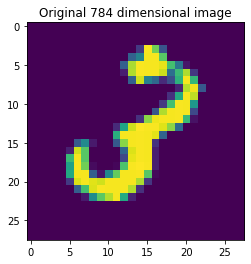

Epoch 6, Iteration 321 -- Loss: 0.090085
Epoch 6, Iteration 322 -- Loss: 0.089860
Epoch 6, Iteration 323 -- Loss: 0.088172
Epoch 6, Iteration 324 -- Loss: 0.088627
Epoch 6, Iteration 325 -- Loss: 0.091340
Epoch 6, Iteration 326 -- Loss: 0.088888
Epoch 6, Iteration 327 -- Loss: 0.088635
Epoch 6, Iteration 328 -- Loss: 0.088545
Epoch 6, Iteration 329 -- Loss: 0.088551
Epoch 6, Iteration 330 -- Loss: 0.090838


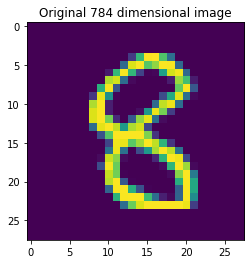

Epoch 6, Iteration 331 -- Loss: 0.088297
Epoch 6, Iteration 332 -- Loss: 0.085258
Epoch 6, Iteration 333 -- Loss: 0.086924
Epoch 6, Iteration 334 -- Loss: 0.088776
Epoch 6, Iteration 335 -- Loss: 0.086784
Epoch 6, Iteration 336 -- Loss: 0.087381
Epoch 6, Iteration 337 -- Loss: 0.087307
Epoch 6, Iteration 338 -- Loss: 0.086758
Epoch 6, Iteration 339 -- Loss: 0.084156
Epoch 6, Iteration 340 -- Loss: 0.087236


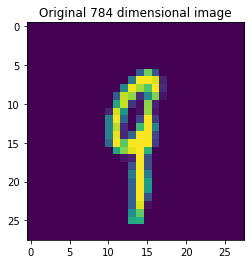

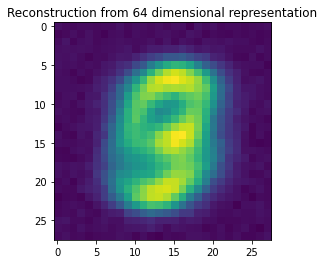

Epoch 6, Iteration 341 -- Loss: 0.083900
Epoch 6, Iteration 342 -- Loss: 0.085644
Epoch 6, Iteration 343 -- Loss: 0.084247
Epoch 6, Iteration 344 -- Loss: 0.084288
Epoch 6, Iteration 345 -- Loss: 0.086429
Epoch 6, Iteration 346 -- Loss: 0.085647
Epoch 6, Iteration 347 -- Loss: 0.083185
Epoch 7, Iteration 348 -- Loss: 0.084092


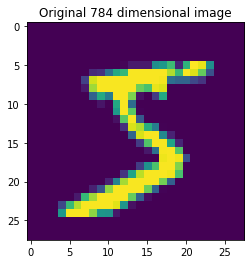

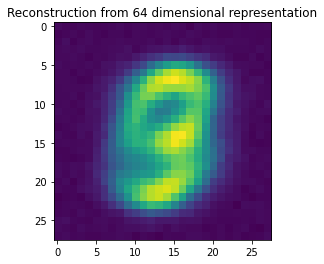

Epoch 7, Iteration 349 -- Loss: 0.084627
Epoch 7, Iteration 350 -- Loss: 0.083679
Epoch 7, Iteration 351 -- Loss: 0.083631
Epoch 7, Iteration 352 -- Loss: 0.085646
Epoch 7, Iteration 353 -- Loss: 0.084614
Epoch 7, Iteration 354 -- Loss: 0.082484
Epoch 7, Iteration 355 -- Loss: 0.084823
Epoch 7, Iteration 356 -- Loss: 0.083800
Epoch 7, Iteration 357 -- Loss: 0.084592
Epoch 7, Iteration 358 -- Loss: 0.083426


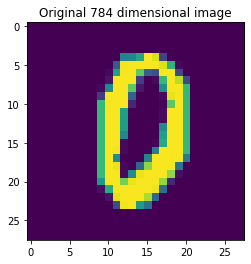

Epoch 7, Iteration 359 -- Loss: 0.081350
Epoch 7, Iteration 360 -- Loss: 0.085619
Epoch 7, Iteration 361 -- Loss: 0.085908
Epoch 7, Iteration 362 -- Loss: 0.083693
Epoch 7, Iteration 363 -- Loss: 0.082093
Epoch 7, Iteration 364 -- Loss: 0.081972
Epoch 7, Iteration 365 -- Loss: 0.080936
Epoch 7, Iteration 366 -- Loss: 0.082313
Epoch 7, Iteration 367 -- Loss: 0.084558
Epoch 7, Iteration 368 -- Loss: 0.082304


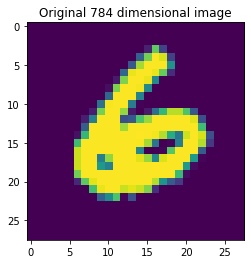

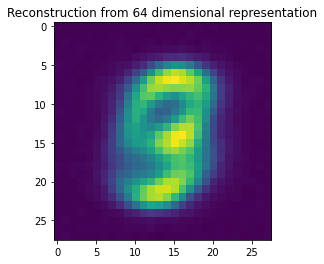

Epoch 7, Iteration 369 -- Loss: 0.083640
Epoch 7, Iteration 370 -- Loss: 0.083899
Epoch 7, Iteration 371 -- Loss: 0.080888
Epoch 7, Iteration 372 -- Loss: 0.081650
Epoch 7, Iteration 373 -- Loss: 0.081731
Epoch 7, Iteration 374 -- Loss: 0.082368
Epoch 7, Iteration 375 -- Loss: 0.082917
Epoch 7, Iteration 376 -- Loss: 0.081897
Epoch 7, Iteration 377 -- Loss: 0.081575
Epoch 7, Iteration 378 -- Loss: 0.081552


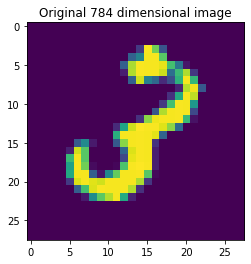

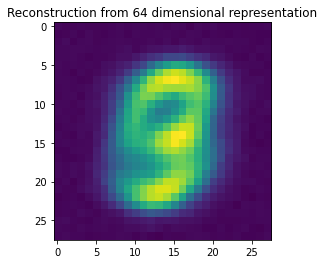

Epoch 7, Iteration 379 -- Loss: 0.081213
Epoch 7, Iteration 380 -- Loss: 0.080735
Epoch 7, Iteration 381 -- Loss: 0.079710
Epoch 7, Iteration 382 -- Loss: 0.080111
Epoch 7, Iteration 383 -- Loss: 0.083795
Epoch 7, Iteration 384 -- Loss: 0.081165
Epoch 7, Iteration 385 -- Loss: 0.080358
Epoch 7, Iteration 386 -- Loss: 0.080727
Epoch 7, Iteration 387 -- Loss: 0.080690
Epoch 7, Iteration 388 -- Loss: 0.082335


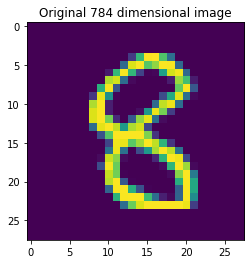

Epoch 7, Iteration 389 -- Loss: 0.081267
Epoch 7, Iteration 390 -- Loss: 0.077462
Epoch 7, Iteration 391 -- Loss: 0.079044
Epoch 7, Iteration 392 -- Loss: 0.080698
Epoch 7, Iteration 393 -- Loss: 0.079552
Epoch 7, Iteration 394 -- Loss: 0.080888
Epoch 7, Iteration 395 -- Loss: 0.081092
Epoch 7, Iteration 396 -- Loss: 0.079574
Epoch 7, Iteration 397 -- Loss: 0.077316
Epoch 7, Iteration 398 -- Loss: 0.080308


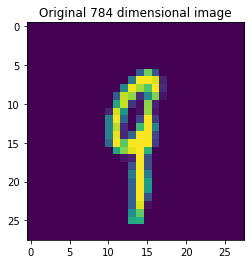

Epoch 7, Iteration 399 -- Loss: 0.077350
Epoch 7, Iteration 400 -- Loss: 0.078483
Epoch 7, Iteration 401 -- Loss: 0.078307
Epoch 7, Iteration 402 -- Loss: 0.078614
Epoch 7, Iteration 403 -- Loss: 0.079736
Epoch 7, Iteration 404 -- Loss: 0.078871
Epoch 7, Iteration 405 -- Loss: 0.077210
Epoch 8, Iteration 406 -- Loss: 0.078042


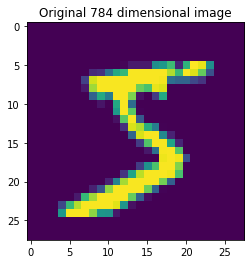

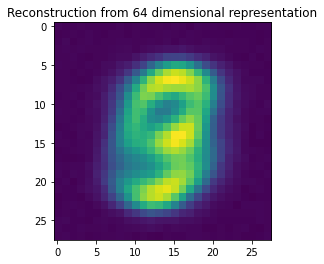

Epoch 8, Iteration 407 -- Loss: 0.079107
Epoch 8, Iteration 408 -- Loss: 0.078194
Epoch 8, Iteration 409 -- Loss: 0.077645
Epoch 8, Iteration 410 -- Loss: 0.080449
Epoch 8, Iteration 411 -- Loss: 0.080253
Epoch 8, Iteration 412 -- Loss: 0.076997
Epoch 8, Iteration 413 -- Loss: 0.078919
Epoch 8, Iteration 414 -- Loss: 0.079020
Epoch 8, Iteration 415 -- Loss: 0.079550
Epoch 8, Iteration 416 -- Loss: 0.079217


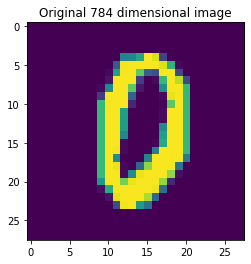

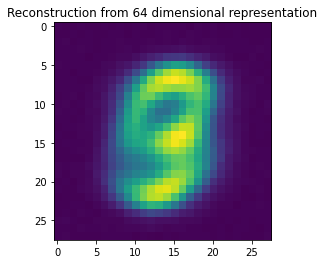

Epoch 8, Iteration 417 -- Loss: 0.076586
Epoch 8, Iteration 418 -- Loss: 0.081447
Epoch 8, Iteration 419 -- Loss: 0.081523
Epoch 8, Iteration 420 -- Loss: 0.078338
Epoch 8, Iteration 421 -- Loss: 0.077265
Epoch 8, Iteration 422 -- Loss: 0.077116
Epoch 8, Iteration 423 -- Loss: 0.075679
Epoch 8, Iteration 424 -- Loss: 0.077765
Epoch 8, Iteration 425 -- Loss: 0.080817
Epoch 8, Iteration 426 -- Loss: 0.078082


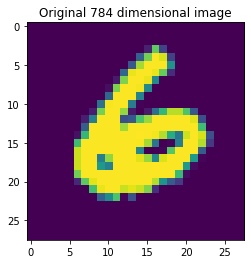

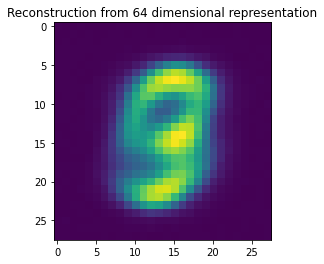

Epoch 8, Iteration 427 -- Loss: 0.079426
Epoch 8, Iteration 428 -- Loss: 0.080452
Epoch 8, Iteration 429 -- Loss: 0.076585
Epoch 8, Iteration 430 -- Loss: 0.077658
Epoch 8, Iteration 431 -- Loss: 0.076837
Epoch 8, Iteration 432 -- Loss: 0.078448
Epoch 8, Iteration 433 -- Loss: 0.079382
Epoch 8, Iteration 434 -- Loss: 0.078128
Epoch 8, Iteration 435 -- Loss: 0.076845
Epoch 8, Iteration 436 -- Loss: 0.076757


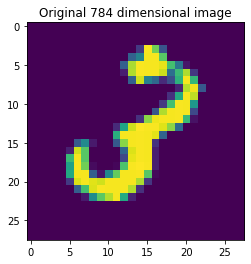

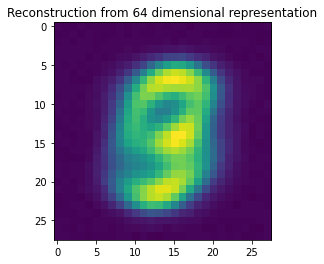

Epoch 8, Iteration 437 -- Loss: 0.077458
Epoch 8, Iteration 438 -- Loss: 0.076808
Epoch 8, Iteration 439 -- Loss: 0.076134
Epoch 8, Iteration 440 -- Loss: 0.076462
Epoch 8, Iteration 441 -- Loss: 0.080508
Epoch 8, Iteration 442 -- Loss: 0.077849
Epoch 8, Iteration 443 -- Loss: 0.076757
Epoch 8, Iteration 444 -- Loss: 0.077275
Epoch 8, Iteration 445 -- Loss: 0.077253
Epoch 8, Iteration 446 -- Loss: 0.078426


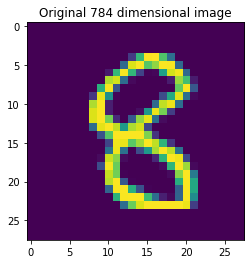

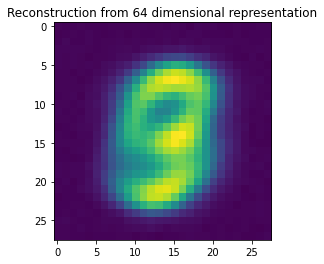

Epoch 8, Iteration 447 -- Loss: 0.078168
Epoch 8, Iteration 448 -- Loss: 0.074020
Epoch 8, Iteration 449 -- Loss: 0.075537
Epoch 8, Iteration 450 -- Loss: 0.076999
Epoch 8, Iteration 451 -- Loss: 0.076328
Epoch 8, Iteration 452 -- Loss: 0.077970
Epoch 8, Iteration 453 -- Loss: 0.078315
Epoch 8, Iteration 454 -- Loss: 0.076297
Epoch 8, Iteration 455 -- Loss: 0.074229
Epoch 8, Iteration 456 -- Loss: 0.077118


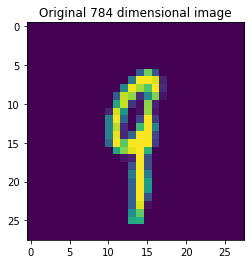

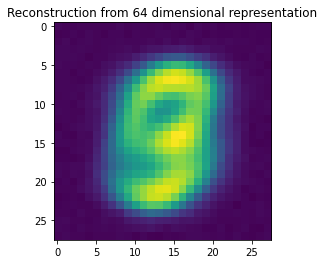

Epoch 8, Iteration 457 -- Loss: 0.074356
Epoch 8, Iteration 458 -- Loss: 0.075148
Epoch 8, Iteration 459 -- Loss: 0.075580
Epoch 8, Iteration 460 -- Loss: 0.076004
Epoch 8, Iteration 461 -- Loss: 0.076552
Epoch 8, Iteration 462 -- Loss: 0.075654
Epoch 8, Iteration 463 -- Loss: 0.074464
Epoch 9, Iteration 464 -- Loss: 0.075189


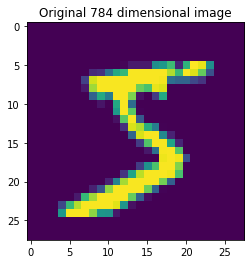

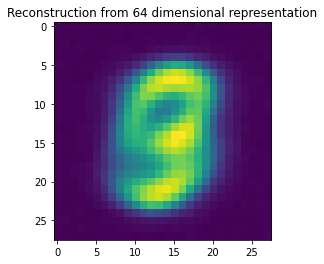

Epoch 9, Iteration 465 -- Loss: 0.076460
Epoch 9, Iteration 466 -- Loss: 0.075629
Epoch 9, Iteration 467 -- Loss: 0.074786
Epoch 9, Iteration 468 -- Loss: 0.077993
Epoch 9, Iteration 469 -- Loss: 0.078184
Epoch 9, Iteration 470 -- Loss: 0.074323
Epoch 9, Iteration 471 -- Loss: 0.075980
Epoch 9, Iteration 472 -- Loss: 0.076708
Epoch 9, Iteration 473 -- Loss: 0.077103
Epoch 9, Iteration 474 -- Loss: 0.077178


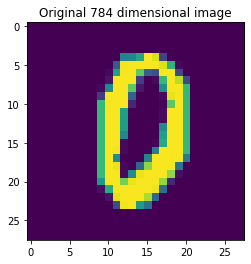

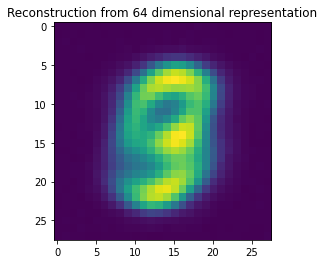

Epoch 9, Iteration 475 -- Loss: 0.074278
Epoch 9, Iteration 476 -- Loss: 0.079396
Epoch 9, Iteration 477 -- Loss: 0.079352
Epoch 9, Iteration 478 -- Loss: 0.075664
Epoch 9, Iteration 479 -- Loss: 0.074856
Epoch 9, Iteration 480 -- Loss: 0.074705
Epoch 9, Iteration 481 -- Loss: 0.073017
Epoch 9, Iteration 482 -- Loss: 0.075482
Epoch 9, Iteration 483 -- Loss: 0.078964
Epoch 9, Iteration 484 -- Loss: 0.075968


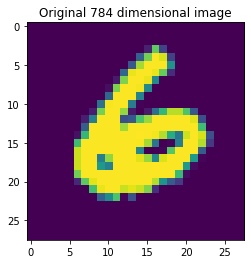

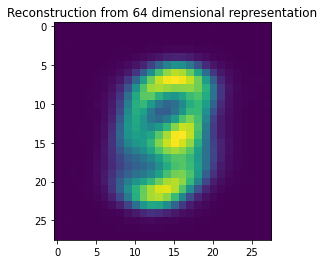

Epoch 9, Iteration 485 -- Loss: 0.077282
Epoch 9, Iteration 486 -- Loss: 0.078702
Epoch 9, Iteration 487 -- Loss: 0.074399
Epoch 9, Iteration 488 -- Loss: 0.075597
Epoch 9, Iteration 489 -- Loss: 0.074263
Epoch 9, Iteration 490 -- Loss: 0.076436
Epoch 9, Iteration 491 -- Loss: 0.077537
Epoch 9, Iteration 492 -- Loss: 0.076156
Epoch 9, Iteration 493 -- Loss: 0.074332
Epoch 9, Iteration 494 -- Loss: 0.074191


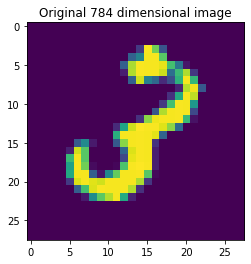

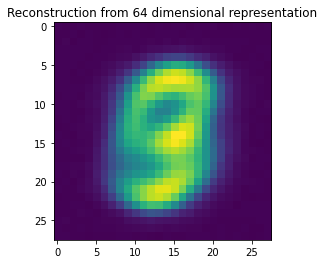

Epoch 9, Iteration 495 -- Loss: 0.075493
Epoch 9, Iteration 496 -- Loss: 0.074736
Epoch 9, Iteration 497 -- Loss: 0.074264
Epoch 9, Iteration 498 -- Loss: 0.074541
Epoch 9, Iteration 499 -- Loss: 0.078727
Epoch 9, Iteration 500 -- Loss: 0.076087
Epoch 9, Iteration 501 -- Loss: 0.074843
Epoch 9, Iteration 502 -- Loss: 0.075406
Epoch 9, Iteration 503 -- Loss: 0.075419
Epoch 9, Iteration 504 -- Loss: 0.076266


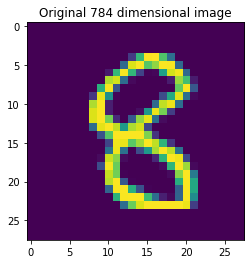

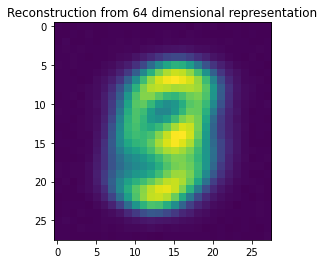

Epoch 9, Iteration 505 -- Loss: 0.076485
Epoch 9, Iteration 506 -- Loss: 0.072181
Epoch 9, Iteration 507 -- Loss: 0.073660
Epoch 9, Iteration 508 -- Loss: 0.074975
Epoch 9, Iteration 509 -- Loss: 0.074589
Epoch 9, Iteration 510 -- Loss: 0.076366
Epoch 9, Iteration 511 -- Loss: 0.076793
Epoch 9, Iteration 512 -- Loss: 0.074504
Epoch 9, Iteration 513 -- Loss: 0.072554
Epoch 9, Iteration 514 -- Loss: 0.075360


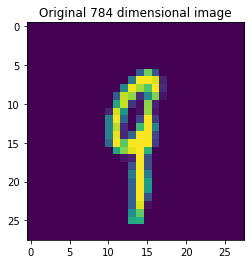

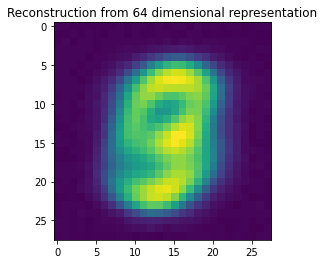

Epoch 9, Iteration 515 -- Loss: 0.072710
Epoch 9, Iteration 516 -- Loss: 0.073306
Epoch 9, Iteration 517 -- Loss: 0.074065
Epoch 9, Iteration 518 -- Loss: 0.074548
Epoch 9, Iteration 519 -- Loss: 0.074756
Epoch 9, Iteration 520 -- Loss: 0.073852
Epoch 9, Iteration 521 -- Loss: 0.072958
Epoch 10, Iteration 522 -- Loss: 0.073590


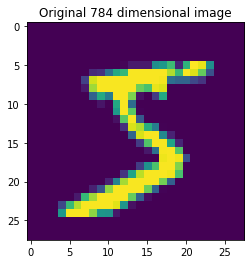

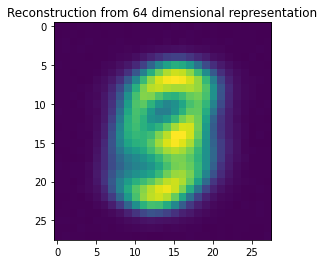

Epoch 10, Iteration 523 -- Loss: 0.074946
Epoch 10, Iteration 524 -- Loss: 0.074196
Epoch 10, Iteration 525 -- Loss: 0.073172
Epoch 10, Iteration 526 -- Loss: 0.076606
Epoch 10, Iteration 527 -- Loss: 0.076992
Epoch 10, Iteration 528 -- Loss: 0.072784
Epoch 10, Iteration 529 -- Loss: 0.074268
Epoch 10, Iteration 530 -- Loss: 0.075379
Epoch 10, Iteration 531 -- Loss: 0.075702
Epoch 10, Iteration 532 -- Loss: 0.075992


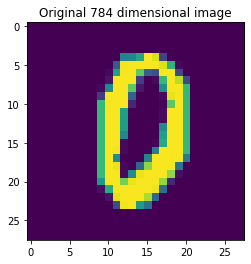

Epoch 10, Iteration 533 -- Loss: 0.072955
Epoch 10, Iteration 534 -- Loss: 0.078194
Epoch 10, Iteration 535 -- Loss: 0.078081
Epoch 10, Iteration 536 -- Loss: 0.074114
Epoch 10, Iteration 537 -- Loss: 0.073450
Epoch 10, Iteration 538 -- Loss: 0.073310
Epoch 10, Iteration 539 -- Loss: 0.071459
Epoch 10, Iteration 540 -- Loss: 0.074144
Epoch 10, Iteration 541 -- Loss: 0.077877
Epoch 10, Iteration 542 -- Loss: 0.074730


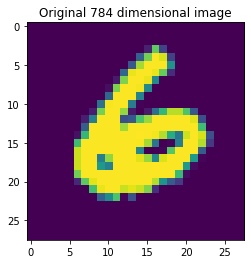

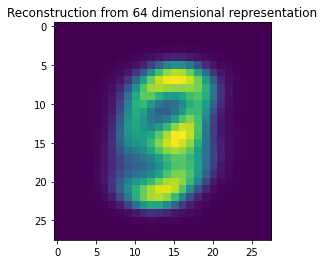

Epoch 10, Iteration 543 -- Loss: 0.076010
Epoch 10, Iteration 544 -- Loss: 0.077654
Epoch 10, Iteration 545 -- Loss: 0.073110
Epoch 10, Iteration 546 -- Loss: 0.074362
Epoch 10, Iteration 547 -- Loss: 0.072712
Epoch 10, Iteration 548 -- Loss: 0.075236
Epoch 10, Iteration 549 -- Loss: 0.076415
Epoch 10, Iteration 550 -- Loss: 0.074961
Epoch 10, Iteration 551 -- Loss: 0.072811
Epoch 10, Iteration 552 -- Loss: 0.072630


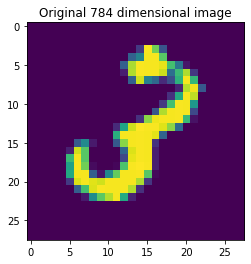

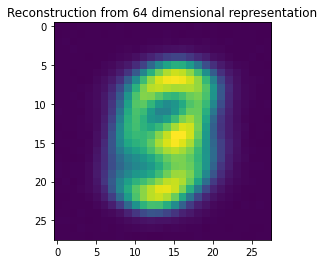

Epoch 10, Iteration 553 -- Loss: 0.074307
Epoch 10, Iteration 554 -- Loss: 0.073479
Epoch 10, Iteration 555 -- Loss: 0.073137
Epoch 10, Iteration 556 -- Loss: 0.073377
Epoch 10, Iteration 557 -- Loss: 0.077617
Epoch 10, Iteration 558 -- Loss: 0.075010
Epoch 10, Iteration 559 -- Loss: 0.073676
Epoch 10, Iteration 560 -- Loss: 0.074248
Epoch 10, Iteration 561 -- Loss: 0.074297
Epoch 10, Iteration 562 -- Loss: 0.074915


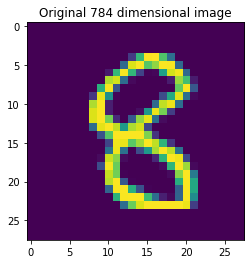

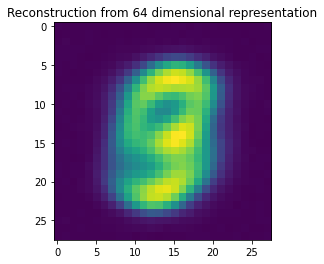

Epoch 10, Iteration 563 -- Loss: 0.075437
Epoch 10, Iteration 564 -- Loss: 0.071060
Epoch 10, Iteration 565 -- Loss: 0.072517
Epoch 10, Iteration 566 -- Loss: 0.073721
Epoch 10, Iteration 567 -- Loss: 0.073520
Epoch 10, Iteration 568 -- Loss: 0.075362
Epoch 10, Iteration 569 -- Loss: 0.075842
Epoch 10, Iteration 570 -- Loss: 0.073391
Epoch 10, Iteration 571 -- Loss: 0.071522
Epoch 10, Iteration 572 -- Loss: 0.074263


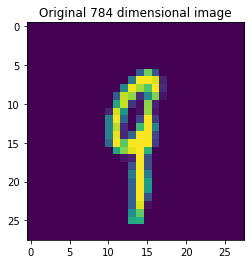

Epoch 10, Iteration 573 -- Loss: 0.071686
Epoch 10, Iteration 574 -- Loss: 0.072161
Epoch 10, Iteration 575 -- Loss: 0.073113
Epoch 10, Iteration 576 -- Loss: 0.073629
Epoch 10, Iteration 577 -- Loss: 0.073618
Epoch 10, Iteration 578 -- Loss: 0.072718
Epoch 10, Iteration 579 -- Loss: 0.072024


In [16]:
# If you are confused what h1, o1, D_w1, etc. means, 
#   refer to the notes at the top of the notebook.
# Otherwise, feel free to delete this comment.


for epoch in range(NUM_EPOCHS): 
    for n in range(ITERATIONS_PER_EPOCH):
        
        ## Sample batch from dataset
        batch_indices = range(n*BATCH_SIZE, n*BATCH_SIZE + BATCH_SIZE)   
        X_batch = X[batch_indices]
        
        ## Forward propagation
        h1 = np.dot(X[batch_indices], w1) ## FILL HERE ##
        o1 = relu(h1) ## FILL HERE ##
        
        h2 = np.dot(o1, w2)  ## FILL HERE ##
        o2 = sigmoid(h2)  ## FILL HERE ##
        
      
        
        loss = mean_squared_error(o2, X_batch)
        
        print('Epoch %d, Iteration %d -- Loss: %.6f' % (epoch + 1, epoch * ITERATIONS_PER_EPOCH + n, loss))
            
        ## Backpropagation

        D_o2 = 2 * (o2 - X_batch) # Can you explain why?
        # We use the mean squared error function as the loss function. 
        # Since we take the derivative according to the loss function to find the derivative of the second output, 
        # the power(2) of the loss function becomes multiplication of 2 in the derivative.
        
        D_h2 = sigmoid_backward(D_o2, o2)
        
        D_o1 = np.dot(D_h2, w2.T)  ## FILL HERE ##
        D_w2 = np.dot(o1.T, D_h2) / o1.shape[1]  ## FILL HERE ##
        
        D_h1 = relu_backward(D_o1, o1)  ## FILL HERE ##
        
        #D_o1 = ## FILL HERE ##
        D_w1 = np.dot(X[batch_indices].T, D_h1) / X.shape[1] ## FILL HERE ##
        
        
        ## Parameter updates
        w1 -= D_w1 * LEARNING_RATE
        w2 -= D_w2 * LEARNING_RATE
        
        
        if n % 10 == 0:
            plt.figure()
            plt.title('Original %d dimensional image' % INPUT_SIZE)
            plt.imshow(X_batch[0].reshape(28, 28)); plt.show()
            
            
            plt.figure()
            plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
            plt.imshow(o2[0].reshape(28, 28)); plt.show()
        
    
    
